# Global life expectancy trend analysis and forecast the life expectancy .

The term "life expectancy" refers to the number of years a person can expect to live. By definition, life expectancy is based on an estimate of the average age that members of a particular population group will be when they die.

       This project aims to analyze global life expectancy trends from 2000 to 2015, recognizing its significance as a measure of a country's overall health and well-being. By examining various factors such as income, education, healthcare expenditure, disease prevalence, and lifestyle habits, we seek to identify the key drivers behind the improvements in life expectancy observed over the past two decades.The dataset used comprises 2938 observations, providing a rich source of information for assessing changes in life expectancy over time. 
    Our analysis will explore the relationship between life expectancy and factors like adult and infant mortality, alcohol consumption, healthcare expenditure, and education to determine their impact on lifespan.


## problem statement
     We aim to look at historical data on life expectancy worldwide and figure out what factors affect how long people live in different places.

# objectives
 - Analyze trends in life expectancy  over a time .
 - Assess the impact of infant death affect the life expectancy 
 - forecast the life expectancy 2016 to 2040 by using past data 
 - impact of life expectancy in developed and developing countries

## Data Understanding


## Inpute variables

  - Country : Country
  - Year : Year
  - Status : Country Developed or Developing status
  - Life expectancy : Life expectancy in age
  - Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
  - infant deaths : Number of Infant Deaths per 1000 population
  - Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
  - percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
  - Hepatitis B : Hepatitis B (Hep_B) immunization coverage among 1-year-olds (%)
  - Measles : Measles - number of reported cases per 1000 population
  - BMI : Average Body Mass Index of entire population
  - under-five deaths : Number of under-five deaths per 1000 population
  - Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)
  - Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)
  - Diphtheria : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
  - HIV/AIDS : Deaths per 1000 live births HIV/AIDS (0-4 years)  
  - GDP : Gross Domestic Product per capita (in USD)
  - Population : Population of the country  
  - thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
  - thinness 5-9 years : Prevalence of thinness among children for Age 5 to 9(%)
  - Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0     to 1)
  - Schooling : Number of years of Schooling(years)


### Libraries import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import os
import statsmodels.api as sm 
import plotly.io as pio
import plotly.figure_factory as ff
pio.templates.default = "plotly_dark"
from scipy import stats


#### Data Inspection

In [2]:
#load the dataset
data=pd.read_csv('Life Expectancy Data (1).csv')
data.head(5)  

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

Thus, there are total 22 columns out of which 2 are of String type, 11 are of Decimal type and remaining of Integer type.

In [3]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace(' ', '')
data.columns = data.columns.str.replace('-', '_')
data.columns = data.columns.str.replace('__', '_')
data.columns = data.columns.str.replace('/', '_or_')
data.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_or_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [4]:
data.tail(5)   

Country  Year      Status  Life_expectancy  Adult_Mortality  \
2933  Zimbabwe  2004  Developing             44.3            723.0   
2934  Zimbabwe  2003  Developing             44.5            715.0   
2935  Zimbabwe  2002  Developing             44.8             73.0   
2936  Zimbabwe  2001  Developing             45.3            686.0   
2937  Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  \
2933             27     4.36                     0.0         68.0       31   
2934             26     4.06                     0.0          7.0      998   
2935             25     4.43                     0.0         73.0      304   
2936             25     1.72                     0.0         76.0      529   
2937             24     1.68                     0.0         79.0     1483   

      ...  Polio  Total_expenditure  Diphtheria  HIV_or_AIDS         GDP  \
2933  ...   67.0               7.13        65.0         33.6  454.366654   
2934  ...    7.0               6.52        68.0         36.7  453.351155   
2935  ...   73.0               6.53        71.0         39.8   57.348340   
2936  ...   76.0               6.16        75.0         42.1  548.587312   
2937  ...   78.0               7.10        78.0         43.5  547.358878   

      Population  thinness_1_19_years  thinness_5_9_years  \
2933  12777511.0                  9.4                 9.4   
2934  12633897.0                  9.8                 9.9   
2935    125525.0                  1.2                 1.3   
2936  12366165.0                  1.6                 1.7   
2937  12222251.0                 11.0                11.2   

      Income_composition_of_resources  Schooling  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[5 rows x 22 columns]

In [5]:
data.shape 

(2938, 22)

In [8]:
data.count()       #Count the number of Non-Missing Values for each variable

Country                            2938
Year                               2938
Status                             2938
Life_expectancy                    2928
Adult_Mortality                    2928
infant_deaths                      2938
Alcohol                            2744
percentage_expenditure             2938
Hepatitis_B                        2385
Measles                            2938
BMI                                2904
under_five_deaths                  2938
Polio                              2919
Total_expenditure                  2712
Diphtheria                         2919
HIV_or_AIDS                        2938
GDP                                2490
Population                         2286
thinness_1_19_years                2904
thinness_5_9_years                 2904
Income_composition_of_resources    2771
Schooling                          2775
dtype: int64

In [9]:
#Display the Complete Summary of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

# Handling Missing Values

In [10]:
#Detecting the Missing Values
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_or_AIDS                          0
GDP                                448
Population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [11]:
## Replacing the Null Values with mean values of the data
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
data['Life_expectancy']=imputer.fit_transform(data[['Life_expectancy']])
data['Adult_Mortality']=imputer.fit_transform(data[['Adult_Mortality']])
data['Alcohol']=imputer.fit_transform(data[['Alcohol']])
data['Hepatitis_B']=imputer.fit_transform(data[['Hepatitis_B']])
data['BMI']=imputer.fit_transform(data[['BMI']])
data['Polio']=imputer.fit_transform(data[['Polio']])
data['Total_expenditure']=imputer.fit_transform(data[['Total_expenditure']])
data['Diphtheria']=imputer.fit_transform(data[['Diphtheria']])
data['GDP']=imputer.fit_transform(data[['GDP']])
data['Population']=imputer.fit_transform(data[['Population']])
data['thinness_1_19_years']=imputer.fit_transform(data[['thinness_1_19_years']])
data['thinness_5_9_years']=imputer.fit_transform(data[['thinness_5_9_years']])
data['Income_composition_of_resources']=imputer.fit_transform(data[['Income_composition_of_resources']])
data['Schooling']=imputer.fit_transform(data[['Schooling']])
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV_or_AIDS                        0
GDP                                0
Population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [12]:
#Descriptive Statistics
data.describe().T

count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life_expectancy                  2938.0  6.922493e+01  9.507640e+00   
Adult_Mortality                  2938.0  1.647964e+02  1.240803e+02   
infant_deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2938.0  4.602861e+00  3.916288e+00   
percentage_expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis_B                      2938.0  8.094046e+01  2.258685e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
BMI                              2938.0  3.832125e+01  1.992768e+01   
under_five_deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2938.0  8.255019e+01  2.335214e+01   
Total_expenditure                2938.0  5.938190e+00  2.400274e+00   
Diphtheria                       2938.0  8.232408e+01  2.364007e+01   
HIV_or_AIDS                      2938.0  1.742103e+00  5.077785e+00   
GDP                              2938.0  7.483158e+03  1.313680e+04   
Population                       2938.0  1.275338e+07  5.381546e+07   
thinness_1_19_years              2938.0  4.839704e+00  4.394535e+00   
thinness_5_9_years               2938.0  4.870317e+00  4.482708e+00   
Income_composition_of_resources  2938.0  6.275511e-01  2.048197e-01   
Schooling                        2938.0  1.199279e+01  3.264381e+00   

                                        min            25%           50%  \
Year                             2000.00000    2004.000000  2.008000e+03   
Life_expectancy                    36.30000      63.200000  7.200000e+01   
Adult_Mortality                     1.00000      74.000000  1.440000e+02   
infant_deaths                       0.00000       0.000000  3.000000e+00   
Alcohol                             0.01000       1.092500  4.160000e+00   
percentage_expenditure              0.00000       4.685343  6.491291e+01   
Hepatitis_B                         1.00000      80.940461  8.700000e+01   
Measles                             0.00000       0.000000  1.700000e+01   
BMI                                 1.00000      19.400000  4.300000e+01   
under_five_deaths                   0.00000       0.000000  4.000000e+00   
Polio                               3.00000      78.000000  9.300000e+01   
Total_expenditure                   0.37000       4.370000  5.938190e+00   
Diphtheria                          2.00000      78.000000  9.300000e+01   
HIV_or_AIDS                         0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     580.486996  3.116562e+03   
Population                         34.00000  418917.250000  3.675929e+06   
thinness_1_19_years                 0.10000       1.600000  3.400000e+00   
thinness_5_9_years                  0.10000       1.600000  3.400000e+00   
Income_composition_of_resources     0.00000       0.504250  6.620000e-01   
Schooling                           0.00000      10.300000  1.210000e+01   

                                          75%           max  
Year                             2.012000e+03  2.015000e+03  
Life_expectancy                  7.560000e+01  8.900000e+01  
Adult_Mortality                  2.270000e+02  7.230000e+02  
infant_deaths                    2.200000e+01  1.800000e+03  
Alcohol                          7.390000e+00  1.787000e+01  
percentage_expenditure           4.415341e+02  1.947991e+04  
Hepatitis_B                      9.600000e+01  9.900000e+01  
Measles                          3.602500e+02  2.121830e+05  
BMI                              5.610000e+01  8.730000e+01  
under_five_deaths                2.800000e+01  2.500000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total_expenditure                7.330000e+00  1.760000e+01  
Diphtheria                       9.700000e+01  9.900000e+01  
HIV_or_AIDS                      8.000000e-01  5.060000e+01  
GDP            

# Data visualization

In [13]:
df=data.drop(columns=['Country','Status'],axis=1)
df

Year  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0     2015             65.0            263.0             62     0.01   
1     2014             59.9            271.0             64     0.01   
2     2013             59.9            268.0             66     0.01   
3     2012             59.5            272.0             69     0.01   
4     2011             59.2            275.0             71     0.01   
...    ...              ...              ...            ...      ...   
2933  2004             44.3            723.0             27     4.36   
2934  2003             44.5            715.0             26     4.06   
2935  2002             44.8             73.0             25     4.43   
2936  2001             45.3            686.0             25     1.72   
2937  2000             46.0            665.0             24     1.68   

      percentage_expenditure  Hepatitis_B  Measles   BMI  under_five_deaths  \
0                  71.279624         65.0     1154  19.1                 83   
1                  73.523582         62.0      492  18.6                 86   
2                  73.219243         64.0      430  18.1                 89   
3                  78.184215         67.0     2787  17.6                 93   
4                   7.097109         68.0     3013  17.2                 97   
...                      ...          ...      ...   ...                ...   
2933                0.000000         68.0       31  27.1                 42   
2934                0.000000          7.0      998  26.7                 41   
2935                0.000000         73.0      304  26.3                 40   
2936                0.000000         76.0      529  25.9                 39   
2937                0.000000         79.0     1483  25.5                 39   

      Polio  Total_expenditure  Diphtheria  HIV_or_AIDS         GDP  \
0       6.0               8.16        65.0          0.1  584.259210   
1      58.0               8.18        62.0          0.1  612.696514   
2      62.0               8.13        64.0          0.1  631.744976   
3      67.0               8.52        67.0          0.1  669.959000   
4      68.0               7.87        68.0          0.1   63.537231   
...     ...                ...         ...          ...         ...   
2933   67.0               7.13        65.0         33.6  454.366654   
2934    7.0               6.52        68.0         36.7  453.351155   
2935   73.0               6.53        71.0         39.8   57.348340   
2936   76.0               6.16        75.0         42.1  548.587312   
2937   78.0               7.10        78.0         43.5  547.358878   

      Population  thinness_1_19_years  thinness_5_9_years  \
0     33736494.0                 17.2                17.3   
1       327582.0                 17.5                17.5   
2     31731688.0                 17.7                17.7   
3      3696958.0                 17.9                18.0   
4      2978599.0                 18.2                18.2   
...          ...                  ...                 ...   
2933  12777511.0                  9.4                 9.4   
2934  12633897.0                  9.8                 9.9   
2935    125525.0                  1.2                 1.3   
2936  12366165.0                  1.6                 1.7   
2937  12222251.0                 11.0                11.2   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        

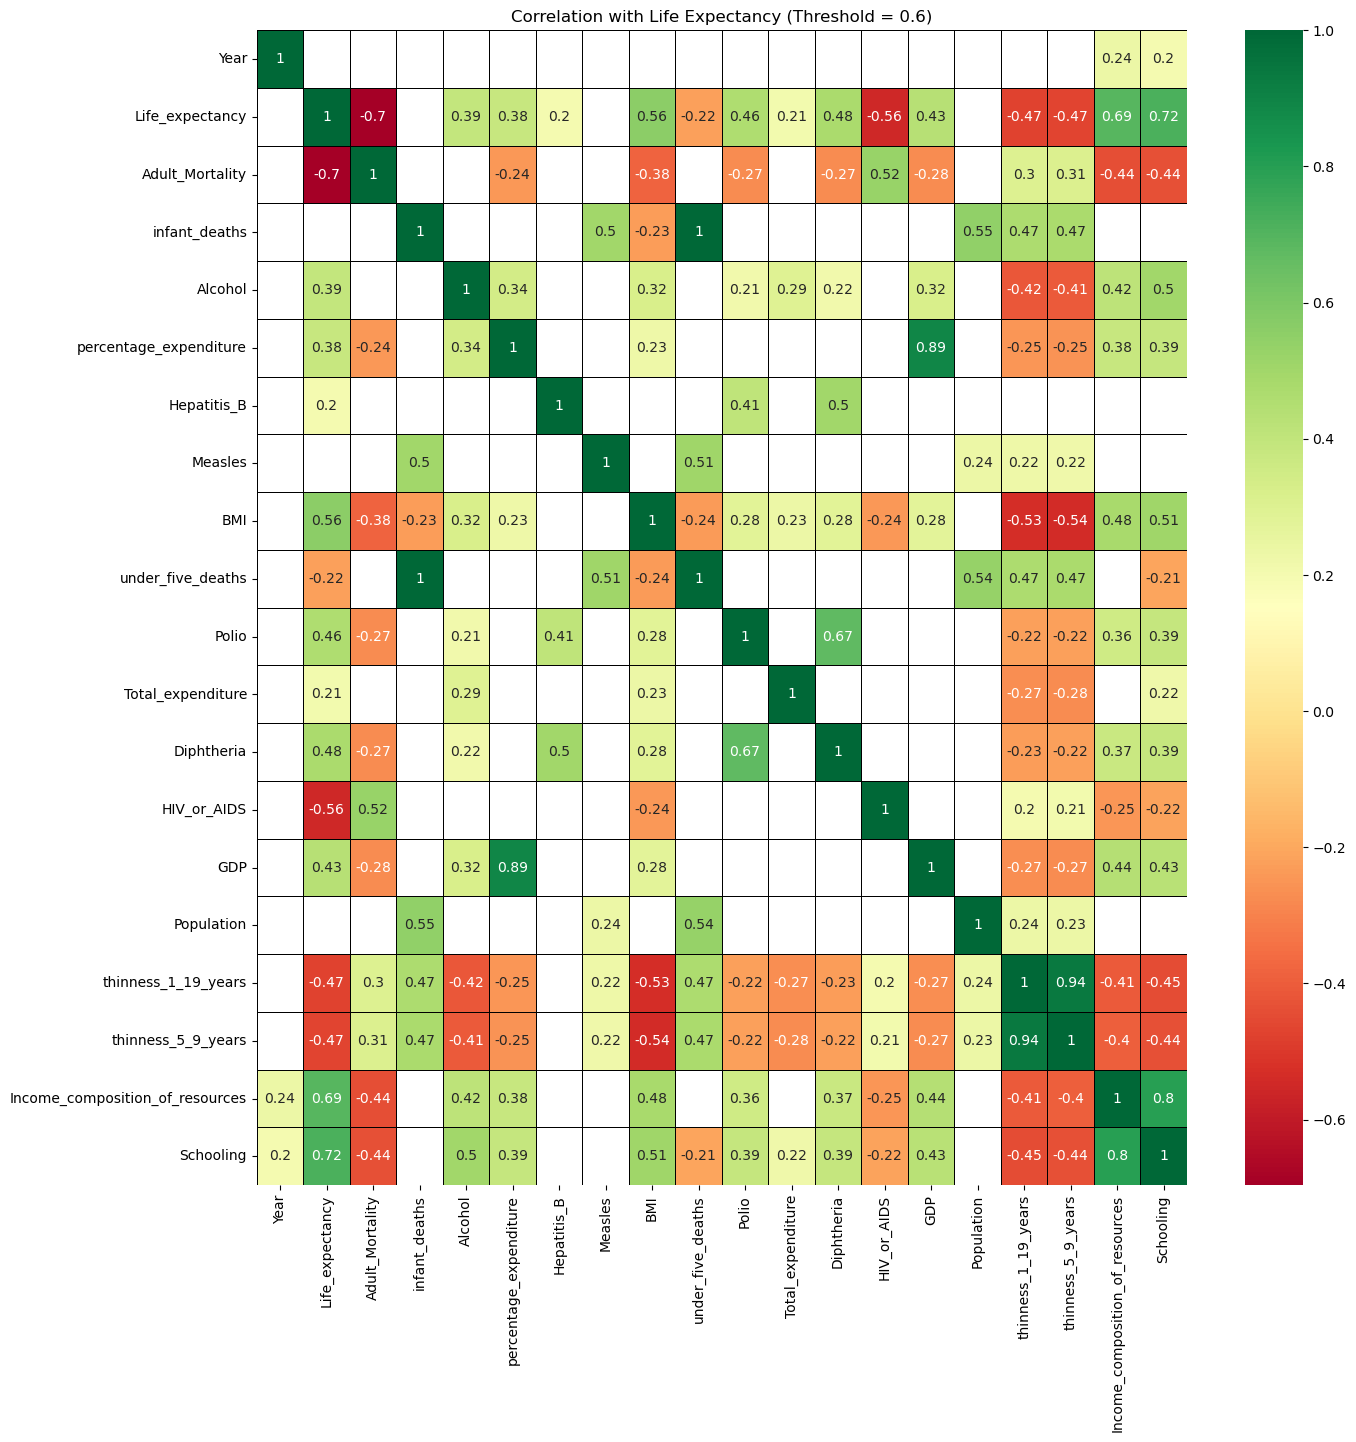

In [14]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 15))

# Compute the correlation matrix
correlation_matrix = df.corr()

# Filter correlation matrix to include only values above the threshold
threshold = 0.2
high_corr_matrix = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]

# Generate heatmap
sns.heatmap(high_corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.4, linecolor='black', ax=ax)
plt.title('Correlation with Life Expectancy (Threshold = 0.6)')
plt.show()


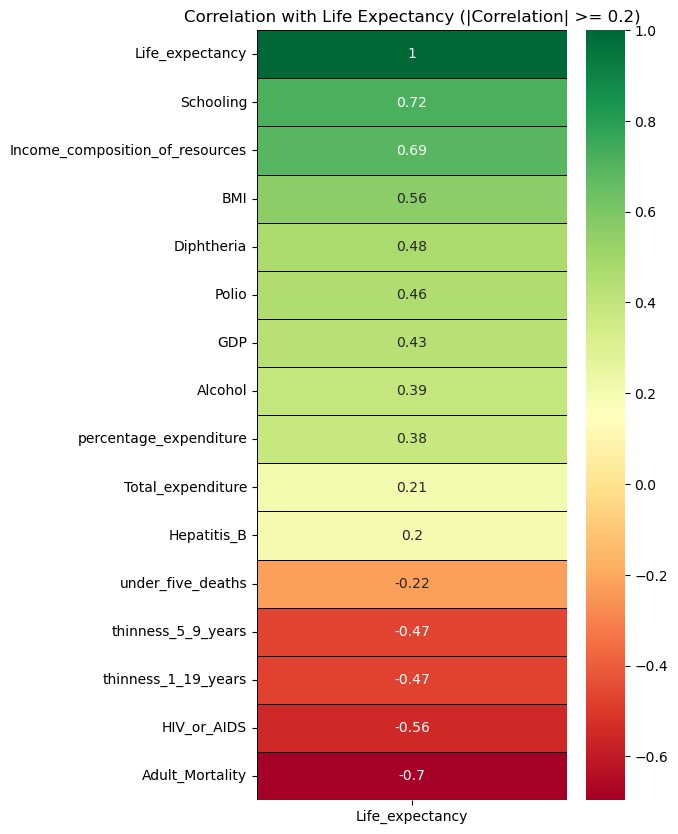

In [15]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5, 10))

# Calculate correlation with 'Life_expectancy' column
corr = df.corrwith(data['Life_expectancy']).sort_values(ascending=False).to_frame()
corr.columns = ['Life_expectancy']

# Filter correlations based on threshold
threshold = 0.2
corr_filtered = corr[abs(corr['Life_expectancy']) >= threshold]

# Generate heatmap
sns.heatmap(corr_filtered, annot=True, cmap='RdYlGn', linewidths=0.4, linecolor='black', ax=ax)
plt.title('Correlation with Life Expectancy (|Correlation| >= 0.2)')
plt.show()


 from the above  chart we can remove the column which are less correlated with the target variable 
      i.e we remove the columns  under_five_deaths ,thinness_5_9_years,thinness_1_19_years ,HIV_or_AIDS,Adult_Mortality .                            

In [16]:
data.drop(columns=['under_five_deaths', 'thinness_1_19_years', 'thinness_5_9_years', 'HIV_or_AIDS', 'Adult_Mortality'], inplace=True)

In [17]:
data.shape

(2938, 17)

## graphical

In [18]:
fig=px.histogram(data,x='Life_expectancy',template='plotly_dark')
fig.show()

We can interpret this graph as the life expectancy is high between the age of 70 to 80 all over the world
i.e the maximum average life expectancy is in between the 70 to 80

In [19]:
fig=px.violin(data,x='Status',y='Life_expectancy',color='Status',template='plotly_dark',box=True,title='Life expectancy Based on Countries status')
fig.show()

from the Above graph we can say that Developing countries have low life expectancy and the developed countries have high life expectancy all over the world.
i.e developed contries have maximum life expectancy as compair to developing contries

In [20]:
px.scatter(data.sort_values(by='Year'),y='infant_deaths',x='Life_expectancy',template='plotly_dark',size='Year',color='Country',opacity=0.6,title='<b>Life Expectancy Versus Infant Deaths of Countries in every Year')


Above graph shows that more infant death low life expectancy. e.g India had 1800 infant death in year 2000 and the life expectancy rate in year 2000 was 62.5 on other hand in 2015 infant death decreases to 910 and life expectancy increases to 68.3. So life expectancy is directly propotional to the death of the infant per year.
  ``DECREASE IN INFANT DEATHS INCREASES LIFE EXPECTANCY``

In [21]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Polio', 'Total_expenditure', 'Diphtheria', 'GDP', 'Population',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

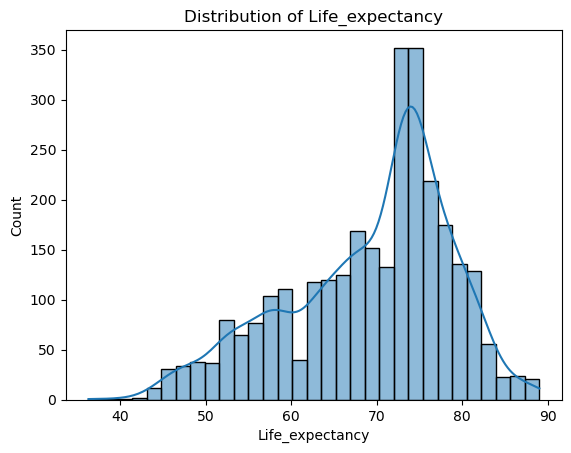

In [22]:
#visualise the distribution of target variable(Life_expectancy )
sns.histplot(data['Life_expectancy'],kde=True)
plt.title('Distribution of Life_expectancy')
plt.show()


<Figure size 2000x3000 with 0 Axes>

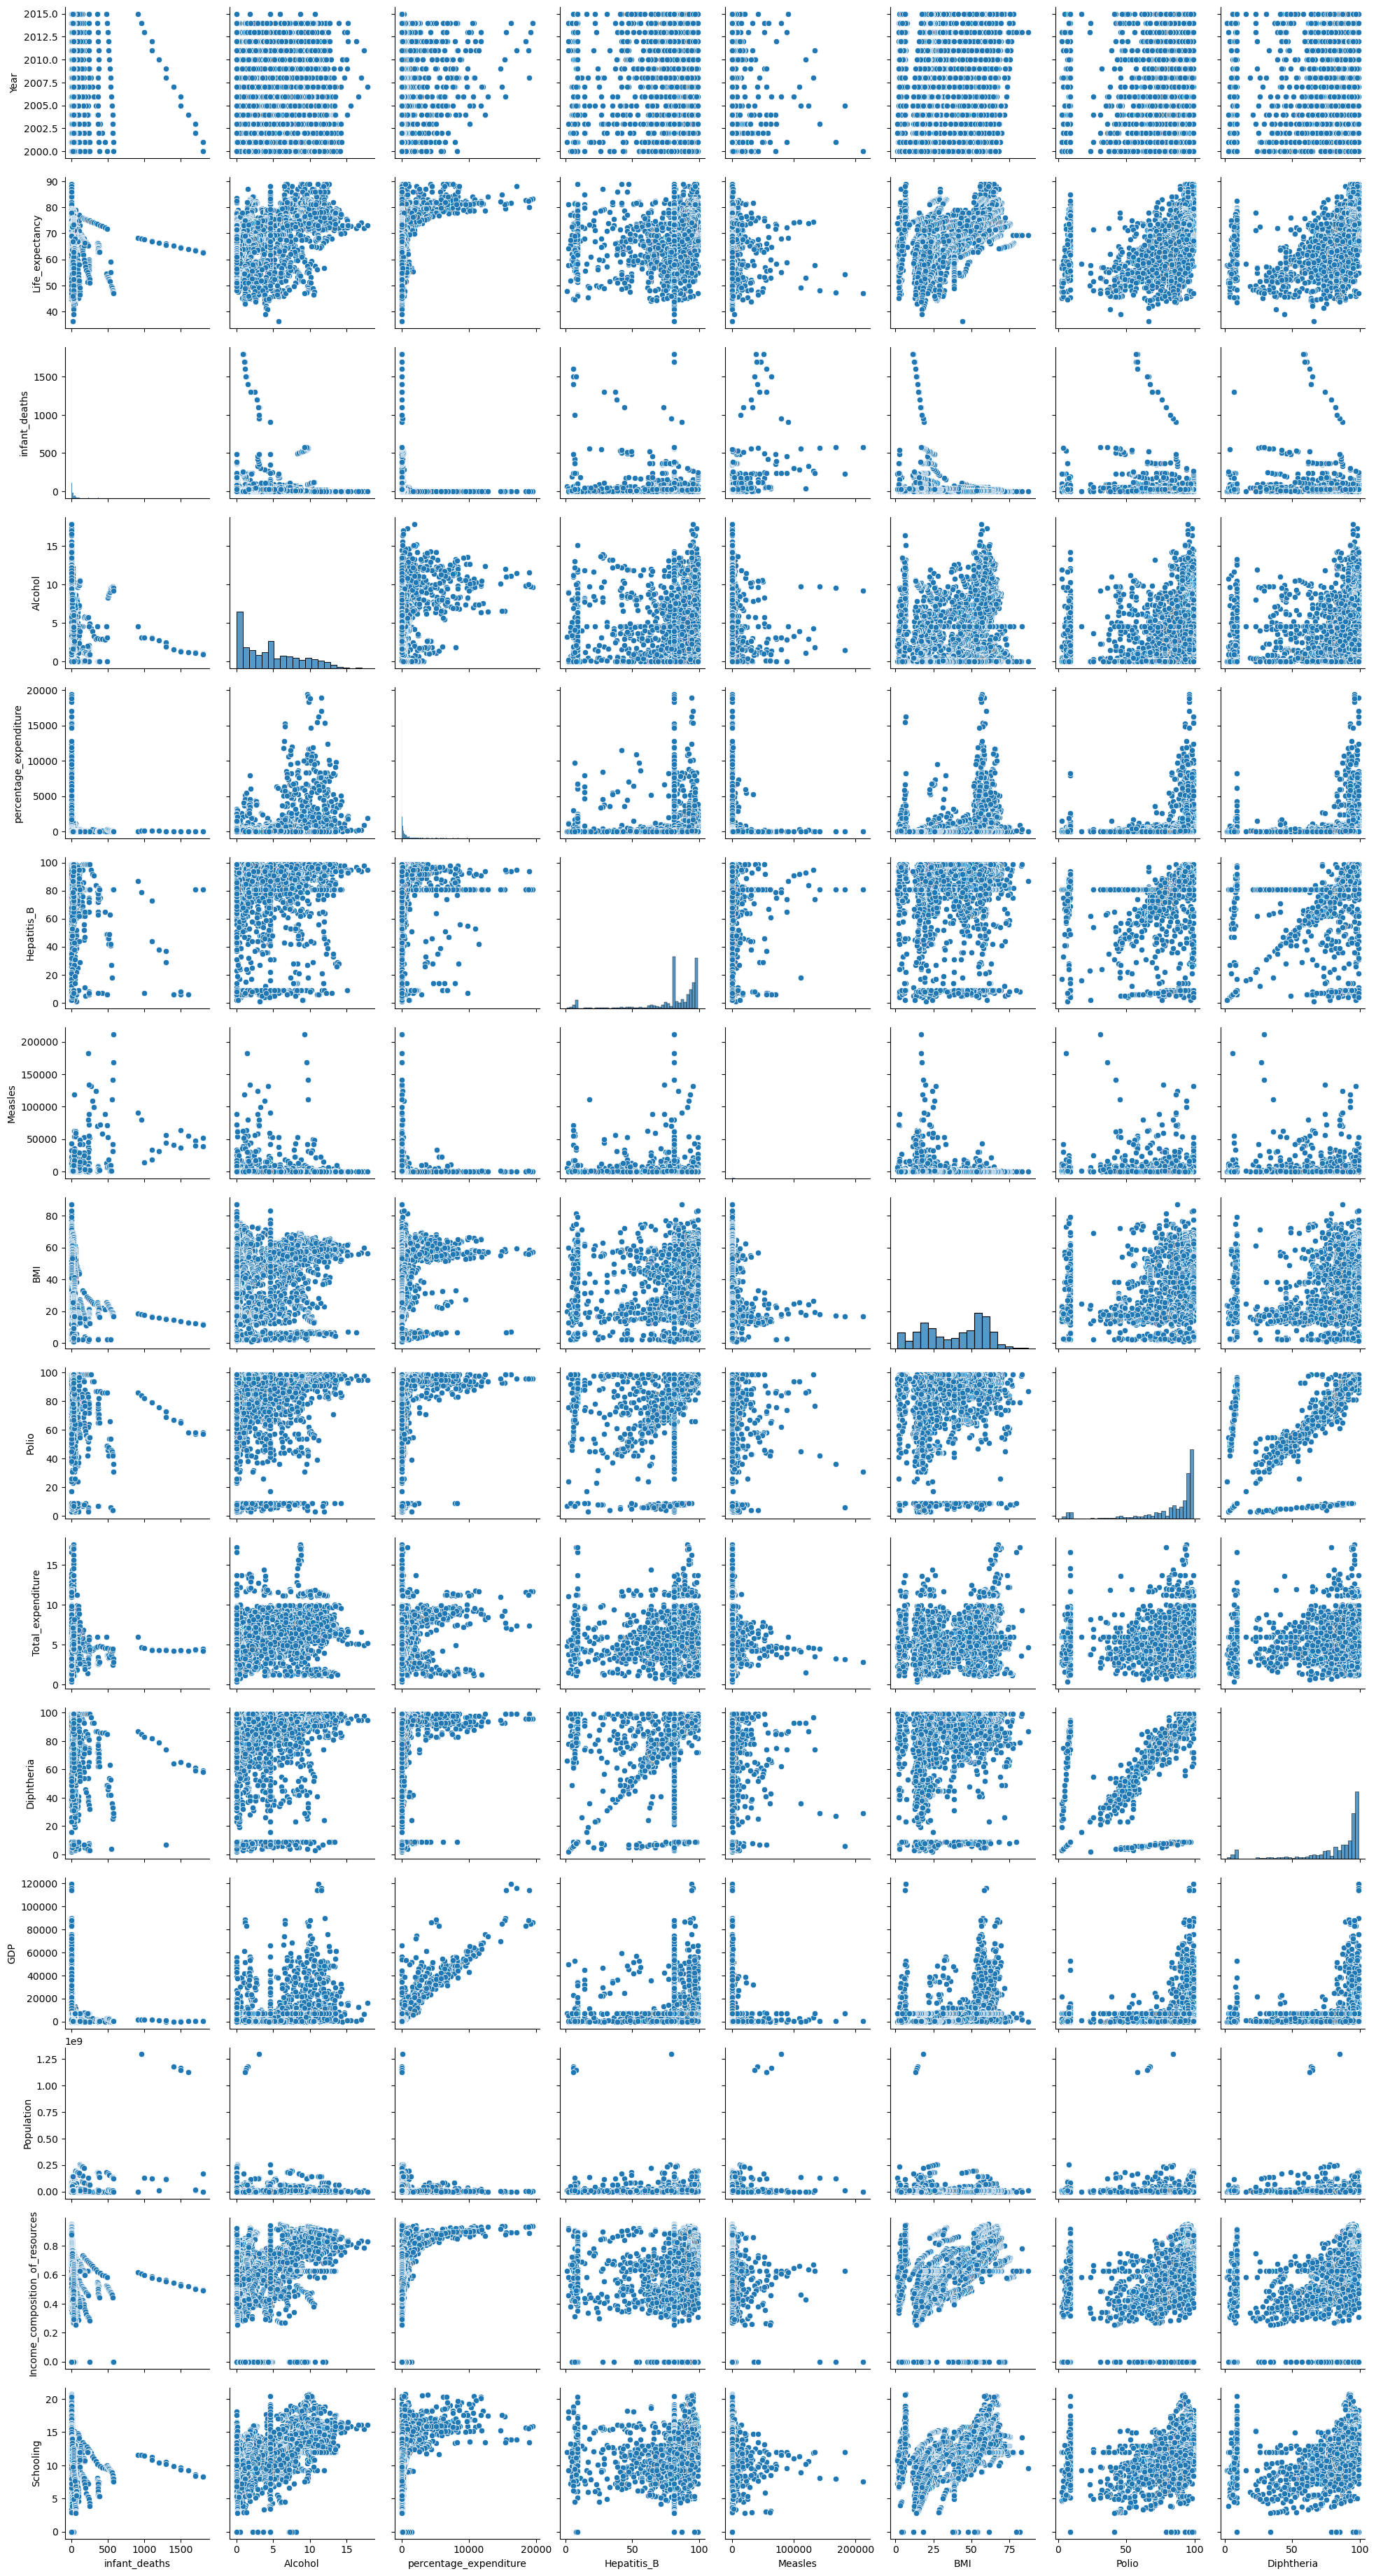

In [23]:
#visualise the relation ship between the Life_expectancy and other features
plt.figure(figsize=(20,30))
sns.pairplot(data,x_vars= ['infant_deaths','Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Polio', 'Diphtheria'])
plt.show()

In [25]:
col_dict = {'Life_expectancy':1 , 'Income_composition_of_resources':2 ,
        'Alcohol':3 , 'percentage_expenditure': 4, 'Hepatitis_B': 5,
       'Measles' : 6, 'BMI': 7, 'infant_deaths' : 8, 'Polio' : 9, 'Total_expenditure' :10,
       'Diphtheria':11, 'GDP':12, 'Population':13, 'Schooling' :14}

### Handling the outliers 

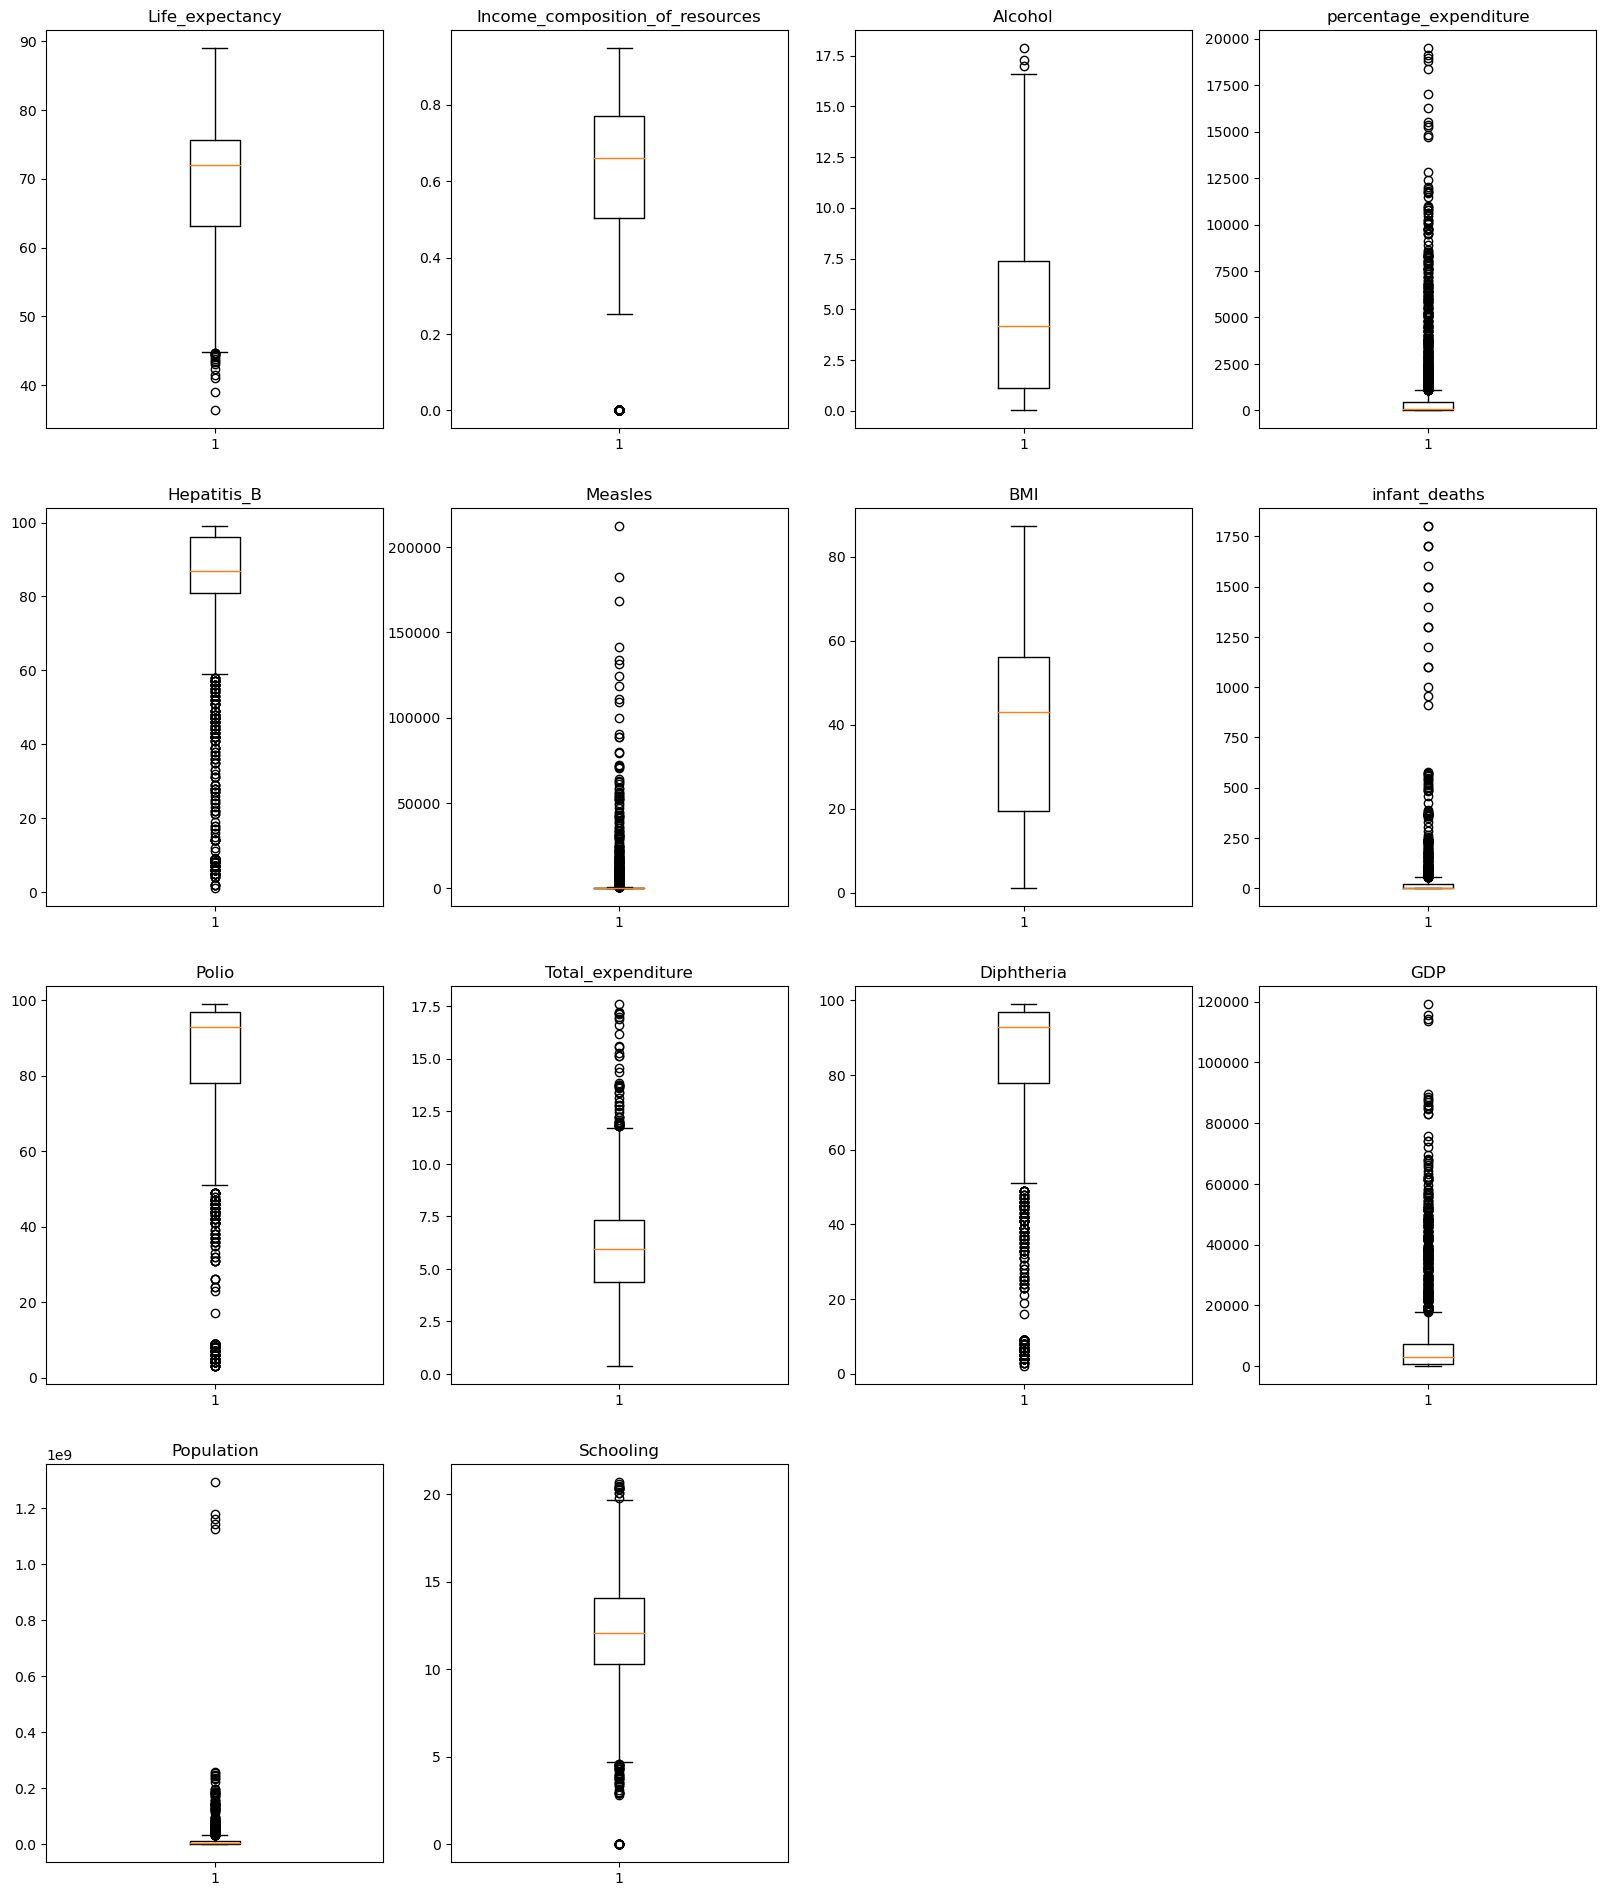

In [26]:
# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [27]:
# Calculate number of outliers and its percentage in each variable using Tukey's method.

for variable in col_dict.keys():
    q75, q25 = np.percentile(data[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((data[variable] > max_val) | 
                                                                                           (data[variable] < min_val))[0])),
                                                                             len((np.where((data[variable] > max_val) | 
                                                                                           (data[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life_expectancy : 17 and 0.8555611474584801
Number of outliers and percentage of it in Income_composition_of_resources : 130 and 6.542526421741319
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in percentage_expenditure : 389 and 19.577252138902868
Number of outliers and percentage of it in Hepatitis_B : 316 and 15.903371917463513
Number of outliers and percentage of it in Measles : 542 and 27.27730246602919
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in infant_deaths : 315 and 15.853044791142425
Number of outliers and percentage of it in Polio : 279 and 14.041268243583291
Number of outliers and percentage of it in Total_expenditure : 51 and 2.5666834423754405
Number of outliers and percentage of it in Diphtheria : 298 and 14.997483643683946
Number of outliers and percentage of it in GDP : 300 and 15.09813789632612
Numb

## handling Outliers in the variables using Winsorization technique.


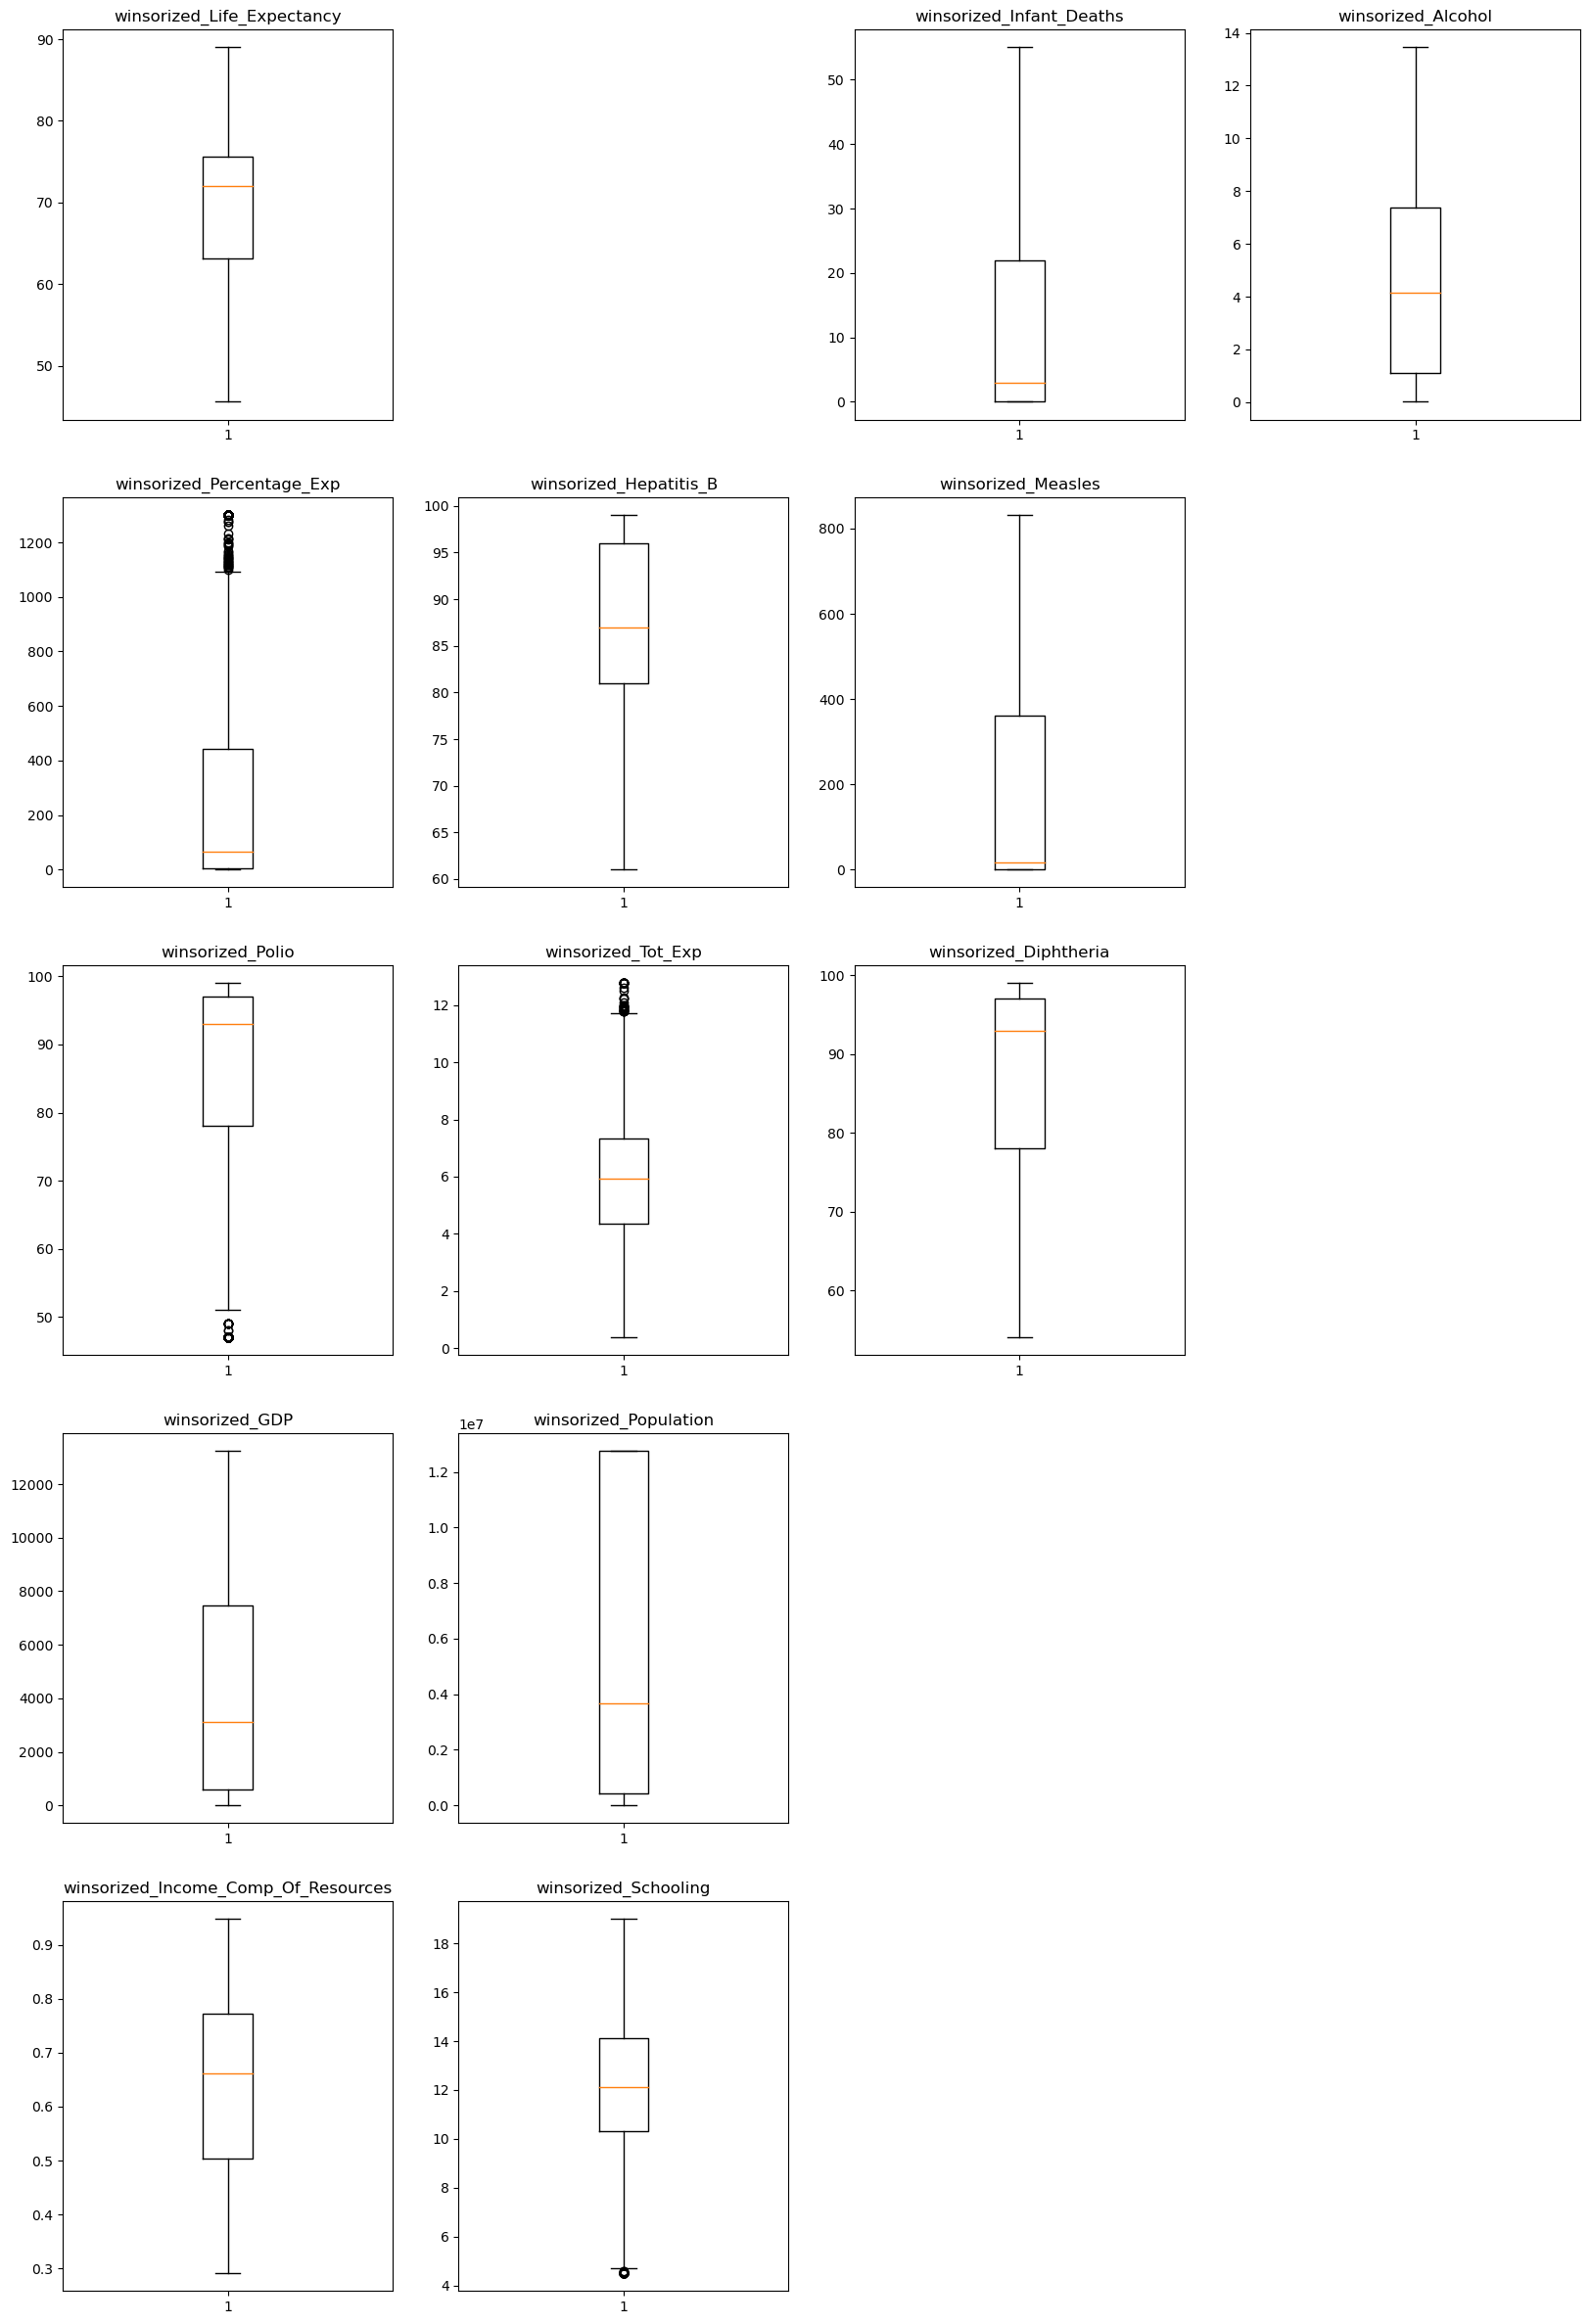

In [28]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(20,30))

plt.subplot(5,4,1)
winsorized_Life_Expectancy = winsorize(data['Life_expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.subplot(5,4,3)
winsorized_Infant_Deaths = winsorize(data['infant_deaths'],(0,0.11))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.subplot(5,4,4)
winsorized_Alcohol = winsorize(data['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.subplot(5,4,5)
winsorized_Percentage_Exp = winsorize(data['percentage_expenditure'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.subplot(5,4,6)
winsorized_HepatitisB = winsorize(data['Hepatitis_B'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_Hepatitis_B")

plt.subplot(5,4,7)
winsorized_Measles = winsorize(data['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.subplot(5,4,9)
winsorized_Polio = winsorize(data['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.subplot(5,4,10)
winsorized_Tot_Exp = winsorize(data['Total_expenditure'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.subplot(5,4,11)
winsorized_Diphtheria = winsorize(data['Diphtheria'],(0.11,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.subplot(5,4,13)
winsorized_GDP = winsorize(data['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.subplot(5,4,14)
winsorized_Population = winsorize(data['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.subplot(5,4,17)
winsorized_Income_Comp_Of_Resources = winsorize(data['Income_composition_of_resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.subplot(5,4,18)
winsorized_Schooling = winsorize(data['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

### Average Life Expectancy Over Time

In [29]:
import plotly.graph_objects as go
# Aggregate data
average_life_expectancy_by_year = data.groupby('Year')['Life_expectancy'].mean().reset_index()

# Create a Plotly line plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=average_life_expectancy_by_year['Year'],
                         y=average_life_expectancy_by_year['Life_expectancy'],
                         mode='lines+markers',
                         name='Average Life Expectancy'))

# Update layout
fig.update_layout(
    title='Average Life Expectancy Over Time',
    xaxis_title='Year',
    yaxis_title='Average Life Expectancy',
    width=800,
    height=400,
    showlegend=True
)

# Show plot
fig.show()


here we can obeserve that the average life expectancy is increase over a time 

##  Applying  Linear regression model 
   
 - Relationship between the independent and dependent variables to be linear.
   

In [30]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [31]:
# Assuming 'data' is your DataFrame and 'target_column' is the column you want to predict
x = df.drop(columns=['Life_expectancy'])  # Features (independent variables)
y = df['Life_expectancy']  # Target variable (dependent variable)
display(x)
display(y)

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
display(x_train)

# Now, X_train and y_train are your training sets, and X_test and y_test are your testing sets


Year  Adult_Mortality  infant_deaths  Alcohol  percentage_expenditure  \
0     2015            263.0             62     0.01               71.279624   
1     2014            271.0             64     0.01               73.523582   
2     2013            268.0             66     0.01               73.219243   
3     2012            272.0             69     0.01               78.184215   
4     2011            275.0             71     0.01                7.097109   
...    ...              ...            ...      ...                     ...   
2933  2004            723.0             27     4.36                0.000000   
2934  2003            715.0             26     4.06                0.000000   
2935  2002             73.0             25     4.43                0.000000   
2936  2001            686.0             25     1.72                0.000000   
2937  2000            665.0             24     1.68                0.000000   

      Hepatitis_B  Measles   BMI  under_five_deaths  Polio  Total_expenditure  \
0            65.0     1154  19.1                 83    6.0               8.16   
1            62.0      492  18.6                 86   58.0               8.18   
2            64.0      430  18.1                 89   62.0               8.13   
3            67.0     2787  17.6                 93   67.0               8.52   
4            68.0     3013  17.2                 97   68.0               7.87   
...           ...      ...   ...                ...    ...                ...   
2933         68.0       31  27.1                 42   67.0               7.13   
2934          7.0      998  26.7                 41    7.0               6.52   
2935         73.0      304  26.3                 40   73.0               6.53   
2936         76.0      529  25.9                 39   76.0               6.16   
2937         79.0     1483  25.5                 39   78.0               7.10   

      Diphtheria  HIV_or_AIDS         GDP  Population  thinness_1_19_years  \
0           65.0          0.1  584.259210  33736494.0                 17.2   
1           62.0          0.1  612.696514    327582.0                 17.5   
2           64.0          0.1  631.744976  31731688.0                 17.7   
3           67.0          0.1  669.959000   3696958.0                 17.9   
4           68.0          0.1   63.537231   2978599.0                 18.2   
...          ...          ...         ...         ...                  ...   
2933        65.0         33.6  454.366654  12777511.0                  9.4   
2934        68.0         36.7  453.351155  12633897.0                  9.8   
2935        71.0         39.8   57.348340    125525.0                  1.2   
2936        75.0         42.1  548.587312  12366165.0                  1.6   
2937        78.0         43.5  547.358878  12222251.0                 11.0   

      thinness_5_9_years  Income_composition_of_resources  Schooling  
0                   17.3                            0.479       10.1  
1                   17.5                            0.476       10.0  
2                   17.7                            0.470        9.9  
3                   18.0                            0.463        9.8  
4                   18.2                            0.454        9.5  
...                  ...                              ...        ...  
2933                 9.4                            0.407        9.2  
2934                 9.9                            0.418        9.5  
2935                 1.3                            0.427       10.0  
2936                 1.7                            0.427        9.8  
2937                11.2                            0.434        9.8  

[2938 rows x 19 columns]

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life_expectancy, Length: 2938, dtype: float64

Year  Adult_Mortality  infant_deaths  Alcohol  percentage_expenditure  \
456   2007            126.0              0     5.28              345.463714   
462   2001            152.0              0     3.81              150.743486   
2172  2011            143.0              0    10.43                0.000000   
2667  2013             13.0              3     1.29              594.645310   
381   2002             95.0              0     0.13              941.703687   
...    ...              ...            ...      ...                     ...   
1638  2011             59.0              0     6.91             3601.287457   
1095  2010            287.0              4     3.21               53.307827   
1130  2007            266.0             17     6.08               56.778587   
1294  2003             72.0              2     9.30             3519.258515   
860   2005             34.0              7     1.07                5.064689   

      Hepatitis_B  Measles   BMI  under_five_deaths  Polio  Total_expenditure  \
456     96.000000        0  25.5                  0   98.0               4.30   
462     80.940461        0  22.1                  0   91.0               5.19   
2172    99.000000        0  44.5                  0   99.0               7.58   
2667    98.000000       16  59.3                  3   98.0               7.26   
381     99.000000        0  28.0                  0   99.0               3.40   
...           ...      ...   ...                ...    ...                ...   
1638    82.000000        3  68.0                  0   96.0               9.60   
1095    83.000000       26  23.1                  7   82.0               6.70   
1130    80.940461        0   4.7                 23   62.0               5.56   
1294    95.000000    10982  57.0                  3   97.0               8.17   
860     96.000000       19  13.9                  9   96.0               2.97   

      Diphtheria  HIV_or_AIDS           GDP    Population  \
456         98.0          0.6   3112.285712  4.864380e+05   
462          9.0          0.8   1268.884564  4.437160e+05   
2172        99.0          0.1   7483.158469  1.275338e+07   
2667        98.0          0.1   4199.472530  1.114558e+06   
381         94.0          0.1  16846.219800  1.275338e+07   
...          ...          ...           ...           ...   
1638        96.0          0.1  22821.847000  4.162680e+05   
1095        83.0          5.9    543.957418  1.555880e+05   
1130        63.0          2.7    615.819819  9.556889e+06   
1294        96.0          0.1  27387.225800  5.731323e+06   
860         96.0          1.6    276.758960  3.969700e+04   

      thinness_1_19_years  thinness_5_9_years  \
456                   8.1                 8.0   
462                   9.4                 9.3   
2172                  4.3                 4.3   
2667                  6.4                 6.3   
381                   6.7                 6.1   
...                   ...                 ...   
1638                  0.8                 0.7   
1095                  8.0                 7.9   
1130                  4.2                 4.2   
1294                  0.5                 0.5   
860                   9.4                 9.5   

      Income_composition_of_resources  Schooling  
456                             0.602       11.9  
462                             0.562       11.0  
2172                            0.733       12.9  
2667                            0.720       14.7  
381                             0.820       13.3  
...                               ...        ...  
1638                            0.826       14.8  
1095                            0.405        8.9  
1130                            0.458        8.4  
1294                            0.841       15.4  
860                             0.000        5.4  

[2350 rows x 19 columns]

In [32]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2350, 19), (2350,), (588, 19), (588,))

## fit a linear regression model

In [33]:
 
model= LinearRegression()
print(model)
model.fit(x_train,y_train)

LinearRegression()


LinearRegression()

### evaluate the model for training  data 

In [34]:
y_pred_train=model.predict(x_train)

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [39]:
mse=mean_squared_error(y_train,y_pred_train)
print('Mean squ error of traing data=',mse)

mae=mean_absolute_error(y_train,y_pred_train)
print('Mean absolute error of traing data=',mae)

acc=r2_score(y_train,y_pred_train)
print('accuracy of the model for the traing data =',acc*100,'%')

Mean squ error of traing data= 16.805108793901905
Mean absolute error of traing data= 3.0482930460865187
accuracy of the model for the traing data = 81.59030274594306 %


## evaluate the model for test data 

In [40]:
y_pred=model.predict(x_test)

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
mse=mean_squared_error(y_test,y_pred)
print('Mean squ error of test data =',mse)

mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error of test data =',mae)

acc=r2_score(y_test,y_pred)
print('accuracy of the model for the test data set =',acc*100,'%')

Mean squ error of test data = 15.360886871291033
Mean absolute error of test data = 2.861247137430806
accuracy of the model for the test data set = 82.26947795445123 %


 The independent variables included in the model can explain approximately 82% of the variance in life expectancy across different observations in the dataset.

Good Fit: An R-squared value of 82% indicates that the linear regression model provides a good fit to the data. It suggests that the relationship between the independent variables and life expectancy is relatively strong and captures a large portion of the variability in life expectancy

# predict the future life expectancy by using Linear regression model 
       here we predict the future  life expectancy  from year 2016 to 2040 .
       by using linear regression we can predict the future life expectancy .

In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from io import BytesIO
import zipfile

# Assuming 'data' is your DataFrame containing the life expectancy data
# Extract data for the years 2000 to 2015
subset_data = data[(data['Year'] >= 2000) & (data['Year'] <= 2015)]

# List to store future predictions for each country
all_predictions = []

# Iterate over unique countries
unique_countries = subset_data['Country'].unique()
for country in unique_countries:
    country_data = subset_data[subset_data['Country'] == country]

    # Extract years and life expectancy data for the country
    years = country_data['Year'].values.reshape(-1, 1)
    life_expectancy = country_data['Life_expectancy'].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(years, life_expectancy)

    # Extrapolate the trend for future years
    future_years = np.arange(2016, 2041).reshape(-1, 1)  # Future years to predict
    future_predictions = model.predict(future_years)

    # Store predictions along with country information
    country_predictions = pd.DataFrame({
        'Country': [country] * len(future_years),
        'Year': future_years.flatten(),
        'Predicted Life Expectancy': future_predictions
    })

    all_predictions.append(country_predictions)

# Concatenate predictions for all countries
all_predictions_df = pd.concat(all_predictions, ignore_index=True)
display(all_predictions_df.head(20))
# Save predictions to a zip file containing CSV files for each country
with BytesIO() as buffer:
    with zipfile.ZipFile(buffer, 'w') as zip_file:
        for country in unique_countries:
            country_df = all_predictions_df[all_predictions_df['Country'] == country]
            csv_data = country_df.to_csv(index=False)
            zip_file.writestr(f'{country}_predictions.csv', csv_data)

    # Write the zip file to disk
    with open('predictions.zip', 'wb') as f:
        f.write(buffer.getvalue())


Country  Year  Predicted Life Expectancy
0   Afghanistan  2016                  62.020000
1   Afghanistan  2017                  62.470147
2   Afghanistan  2018                  62.920294
3   Afghanistan  2019                  63.370441
4   Afghanistan  2020                  63.820588
5   Afghanistan  2021                  64.270735
6   Afghanistan  2022                  64.720882
7   Afghanistan  2023                  65.171029
8   Afghanistan  2024                  65.621176
9   Afghanistan  2025                  66.071324
10  Afghanistan  2026                  66.521471
11  Afghanistan  2027                  66.971618
12  Afghanistan  2028                  67.421765
13  Afghanistan  2029                  67.871912
14  Afghanistan  2030                  68.322059
15  Afghanistan  2031                  68.772206
16  Afghanistan  2032                  69.222353
17  Afghanistan  2033                  69.672500
18  Afghanistan  2034                  70.122647
19  Afghanistan  2035                  70.572794

In [44]:
data.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [45]:
import zipfile

# Open the zip file
with zipfile.ZipFile('predictions.zip', 'r') as zip_ref:
    # Extract all the contents of the zip file to a temporary directory
    zip_ref.extractall('predictions')

# Read each CSV file and store them in a dictionary
predictions_by_country = {}
with zipfile.ZipFile('predictions.zip', 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        # Read the CSV file into a DataFrame
        country = file_name.split('_')[0]
        with zip_ref.open(file_name) as file:
            df = pd.read_csv(file)
            predictions_by_country[country] = df

# Access predictions for a specific country
country_name = 'India'
if country_name in predictions_by_country:
    print(predictions_by_country[country_name])
else:
    print(f"No predictions found for {country_name}.")


   Country  Year  Predicted Life Expectancy
0    India  2016                  68.750000
1    India  2017                  69.141912
2    India  2018                  69.533824
3    India  2019                  69.925735
4    India  2020                  70.317647
5    India  2021                  70.709559
6    India  2022                  71.101471
7    India  2023                  71.493382
8    India  2024                  71.885294
9    India  2025                  72.277206
10   India  2026                  72.669118
11   India  2027                  73.061029
12   India  2028                  73.452941
13   India  2029                  73.844853
14   India  2030                  74.236765
15   India  2031                  74.628676
16   India  2032                  75.020588
17   India  2033                  75.412500
18   India  2034                  75.804412
19   India  2035                  76.196324
20   India  2036                  76.588235
21   India  2037                